1. このSprintについて  

**Sprintの目的**  
- スクラッチを通して線形回帰を理解する
- オブジェクト指向を意識した実装に慣れる
- 数式をコードに落とし込めるようにする

**どのように学ぶか**   
スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。



In [5]:
#単純なデータで基礎から学ぶ
X=[1,2,3,6,7]
y=[1,3,3,5,4]

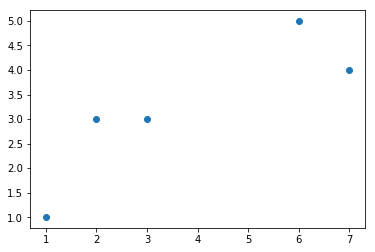

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X,y)
plt.show()

原点を通る直線で近似
xは特徴量、yはターゲット
特徴量行列Xがn*1の特別な場合で、Xに当たるものを小文字xで表す
xiに対応する出力値がyi
近似としては最小二乗法：直線で近似した時の誤差の二乗の和を考えて、最小化


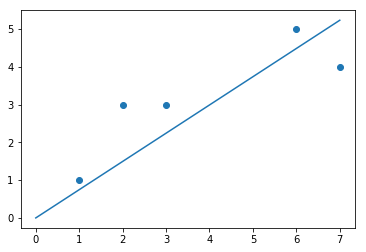

In [7]:
import numpy as np

def reg1dim1(x,y):
    a=np.dot(x,y)/(x**2).sum() #NumPyの内積を計算する関数np.dot x.T*y=np.dot(x,y) ||x||**2=(x**2).sum()
    return a

x=np.array([1,2,3,6,7])
y=np.array([1,3,3,5,4])

a= reg1dim1(x,y)

plt.scatter(x,y)
xmax= x.max()
plt.plot([0, xmax], [0, a*xmax])
plt.show()

In [8]:
a

0.7474747474747475

In [9]:
#線形回帰モデル
import numpy as np
from scipy import linalg
from mpl_toolkits.mplot3d import axes3d

class LinearRegression:
    def __init__(self):  #インスタンス化する時に __init__ (self)
        self.w = None
    
    def fit(self, X, y):
        Xtil = np.concatenate[np.ones(X.shape[0]), X]#行列Xの左に要素1からなる列を一つ加える：XtillでX~
        A = np.dot(Xtil.T, Xtil)
        b = np.dot(Xtil.T, y)
        seif.w_ = linalg.solve(A, b)
        
    def predict(self, X):
        if X.ndim == 1:#ndimは次元数
            X = X.reshape(1, -1)
        Xtil = np.concatenate[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)
    
#fitメソッドで訓練データの学習を行う、計算結果はself.w_に格納される
#Xは入力訓練データ、tは出力訓練データ
#predictメソッド、行列Xを引数に、学習時と同様にXの各行をサンプルとして予測、内部ではXの左に1を付加しself.w_との積
        

2. 線形回帰スクラッチ  
線形回帰のクラスをスクラッチで作成していきます。  
NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import loadtxt, zeros, ones, array, linspace, logspace
import pandas as pd
import seaborn as sns

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.coef_ = coef_
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose == True:
            #verboseをTrueにした際は学習過程を出力
            print("")
        pass


    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """

        pass
        return



In [5]:
X=np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [14]:
#Evaluate the linear regression
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta).flatten()

    sqErrors = (predictions - y) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta).flatten()

        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]

        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

### 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
h
θ
(
x
)
=
θ
0
x
0
+
θ
1
x
1
+
.
.
.
+
θ
j
x
j
+
.
.
.
+
θ
n
x
n
.
(
x
0
=
1
)
$$

x
 : 特徴量ベクトル

θ
 : パラメータベクトル

n
 : 特徴量の数

x
j
 : j番目の特徴量

θ
j
 : j番目のパラメータ（重み）

特徴量の数
n
は任意の値に対応できる実装にしてください。

なお、ベクトル形式で表すと以下のようになります


$$
h
θ
(
x
)
=
θ
T
⋅
x
.
$$

In [6]:
#クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。
#クラスにするためにselfがある
def _linear_hypothesis(X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    one = np.ones(X.shape[0]).reshape(-1 , 1)
    X = np.concatenate([X , one] , axis = 1)
    #X = np.insert(X , 0 , 1, axis = 1)
    theta = np.random.rand(X.shape[1])
    #print(theta.shape)
    #print(X.shape)
    #print(one.shape)
    h = np.dot(theta , X.T)
    return h

In [9]:
_linear_hypothesis(X)

array([1.10596701, 4.4245909 , 7.74321479])

In [8]:
y = np.arange(3)
y


array([0, 1, 2])

In [58]:
#hypoは一次元にした方が扱いやすい

### 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$
θ
j
:=
θ
j
−
α
1
m
m
∑
i
=
1
 
[
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
x
(
i
)
j
]
$$

α
 : 学習率

i
 : サンプルのインデックス

j
 : 特徴量のインデックス

error
$$
h θ ( x ( i ) ) − y ( i )
$$

In [11]:
def error(h , y):
    return h - y
error(_linear_hypothesis(X) , y)

array([1.22023067, 2.16455446, 3.10887825])

In [12]:
def _gradient_descent(X , lr = 0.01 ):
    """
    説明を記述
    """
    theta = np.random.rand(X.shape[1])
    theta = theta - lr * np.dot(error( _linear_hypothesis(X) , y) , X ) / X.shape[0]
    return theta

In [13]:
_gradient_descent(X)

array([0.76234765, 0.09798459])

### 【問題3】推定  
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数 
h
θ
(
x
)
 の出力が推定結果です

In [14]:
def predict(X):
    y_pred = _linear_hypothesis(X)
    return y_pred

### 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。

$$ 
L
(
θ
)
=
1
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
2
.
$$

m
 : 入力されるデータの数

h
θ
(
)
 : 仮定関数

x
(
i
)
 : i番目のサンプルの特徴量ベクトル

y
(
i
)
 : i番目のサンプルの正解値

なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

In [15]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.sum((y_pred - y)**2) / X.shape[0]
    
    return mse

In [16]:
y_pred = _linear_hypothesis(X)
MSE(y_pred , y)

0.37262016997902125

### 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） 
J
(
θ
)
 は次の式です。

J
(
θ
)
=
1
2
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
2
.
m
 : 入力されるデータの数

h
θ
(
)
 : 仮定関数

x
(
i
)
 : i番目のサンプルの特徴量ベクトル

y
(
i
)
 : i番目のサンプルの正解値

In [17]:
def j_loss(X , y):
    return np.sum((y_pred - y)**2) / (2*X.shape[0])

print("j_loss:{}".format(j_loss(X,y)))
print("MSE/2 :{}".format(MSE(y_pred , y)/2))

j_loss:0.18631008498951063
MSE/2 :0.18631008498951063


In [18]:

class ScratchLinearRegression():
    
    def __init__(self , num_iter = 100, lr = 0.01 , bias = True, verbose = True):
        self.h = None
        self.theta = None
        
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        
        
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self , X):
        #self.one = np.ones(X.shape[0]).reshape(-1 , 1)
        #self.x = np.concatenate([X , self.one] , axis = 1)
        self.h = np.dot(self.theta , X.T)
        return self.h
    
    def _get_error(self , h , y):
        return self.h - y
    
    def _gradient_descent(self , X , error):
        self.theta = self.theta - self.lr * np.dot(self.error , X ) / X.shape[0]
        return self.theta
    
    def _get_j_loss(self , X , y):
        #print(self.theta)
        return np.sum((self.y_pred - y)**2) / (2*X.shape[0])
    
    def _get_MSE(self , y , y_pred):
        return  np.sum((self.y_pred - y)**2) / X.shape[0]
    
    def _get_predict(self, X):
        self.y_pred = self._linear_hypothesis(X)
        return self.y_pred
    
    #def _get_one(self.X):
        #if self.bias:
            #self.one = np.ones(X.shape[0]).reshape(-1 , 1)
            #X = np.concatenate([self.one , X] , axis = 1)
        #return X
    
    def fit(self , X , y , X_val=None, y_val=None):
        if self.bias:
            self.one = np.ones(X.shape[0]).reshape(-1 , 1)
            X = np.concatenate([X , self.one] , axis = 1)
            
            if X_val is not None:
                self.one = np.ones(X_val.shape[0]).reshape(-1 , 1)
                X_val = np.concatenate([X_val , self.one] , axis = 1)

        self.theta = np.random.rand(X.shape[1])

        for i in range(self.iter):
            self.h = self._linear_hypothesis(X)
            self.error = self._get_error(self.h ,y)
            self._gradient_descent( X , error)
            self.y_pred = self._get_predict(X)
            self.mse = self._get_MSE(y , self.y_pred)
            self.loss[i] = self.mse
            
            if X_val is not None:
                #self.h = self._linear_hypothesis(X)
                self.y_pred_val = self._get_predict(X_val)
                self.mse_val = self._get_MSE(y_val , self.y_pred_val )
                self.val_loss[i] = self.mse_val

            
        if self.verbose:
        #verboseをTrueにした際は学習過程を出力
            print(self.loss)
            
    def predict(self , X):
        if self.bias:
            self.one = np.ones(X.shape[0]).reshape(-1 , 1)
            X = np.concatenate([X , self.one] , axis = 1)
        return self._get_predict(X)

3.検証

### 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [23]:
df = pd.read_csv("train.csv")
X = df.loc[: , ["GrLivArea" , "YearBuilt"]].values
y = df.loc[: , "SalePrice"].values

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import loadtxt, zeros, ones, array, linspace, logspace
import pandas as pd
import seaborn as sns



In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test =  train_test_split(
               X , y , test_size = 0.25)

In [26]:
slr = ScratchLinearRegression(num_iter=10000, lr=0.000000001)

In [27]:
slr.fit(X_train , y_train , X_test , y_test)

[2.82239326e+10 2.79075181e+10 2.75950516e+10 ... 2.24112977e+09
 2.24112189e+09 2.24111401e+09]


### 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。




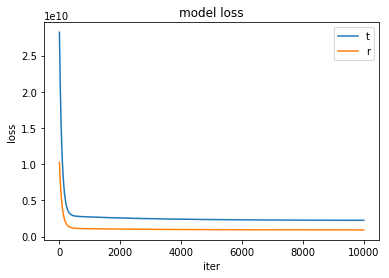

In [28]:
plt.plot(np.arange(1 , len(slr.loss) + 1) , slr.loss , label = "train_loss")
plt.plot(np.arange(1 , len(slr.val_loss) + 1) , slr.val_loss , label = "test_loss")
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend("train_loss")
plt.show()